In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.preprocess.feature import Feature
from genrecog.tools.trainer import SklearnTrainer
import torch

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X,y = train_preprcessor.as_shuffled_numpy()
X_test, y_test = test_preprcessor.as_shuffled_numpy()


In [6]:
feature_maker = Feature()
X_features = feature_maker.numpy_fbank_features(X).reshape(-1,702*40)
X_test_features = feature_maker.numpy_fbank_features(X_test).reshape(-1,702*40)

In [7]:
models = {
    "mlp": {
        "name": "mlp",
        "parameters": {
            "hidden_layer_sizes": (128,128,128,128,128),
            "solver": "adam",
            "max_iter": 100,
            "early_stopping": True,
         }
    },
    "svm_ovo": {
          "name": "svm",
          "parameters": {
            "decision_function_shape":"ovo"
          }
    },
    "svm_ovr": {
          "name": "svm",
          "parameters": {
            "decision_function_shape":"ovr"
          }
    },
    "decision_tree": {
          "name": "decision_tree",
          "parameters": {
          }
    },
    "random_forest": {
          "name": "random_forest",
          "parameters": {
          }
    },

}

In [8]:
trainer = SklearnTrainer(models=models, use_norm=True, use_pca=True, pca_size=100)
trainer.train(X_features, y)


Training MLP
Model information:  MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 128, 128, 128, 128),
              max_iter=100)
Training SVM_OVO
Model information:  SVC(decision_function_shape='ovo')
Training SVM_OVR
Model information:  SVC()
Training DECISION_TREE
Model information:  DecisionTreeClassifier()
Training RANDOM_FOREST
Model information:  RandomForestClassifier()


In [9]:
evaluations = trainer.eval(X_test_features, y_test)

Evaluating MLP
Evaluating SVM_OVO
Evaluating SVM_OVR
Evaluating DECISION_TREE
Evaluating RANDOM_FOREST
All models are evaluated.


In [10]:
trainer.classification_report();

CLASSIFICATION REPORT FOR MLP:

              precision    recall  f1-score   support

     country       0.65      0.38      0.48        69
      reggae       0.38      0.45      0.41        33
       metal       0.50      0.53      0.51        38
         pop       0.93      0.86      0.89        43
   classical       0.85      0.87      0.86        39
       disco       0.38      0.39      0.38        38
      hiphop       0.38      0.50      0.43        30
       blues       0.33      0.33      0.33        39
        jazz       0.35      0.67      0.46        21
        rock       0.45      0.36      0.40        50

    accuracy                           0.52       400
   macro avg       0.52      0.53      0.52       400
weighted avg       0.54      0.52      0.52       400

CLASSIFICATION REPORT FOR SVM_OVO:

              precision    recall  f1-score   support

     country       0.55      0.39      0.45        57
      reggae       0.33      0.30      0.31        43
       met

CONFUSION MATRIX FOR MLP:



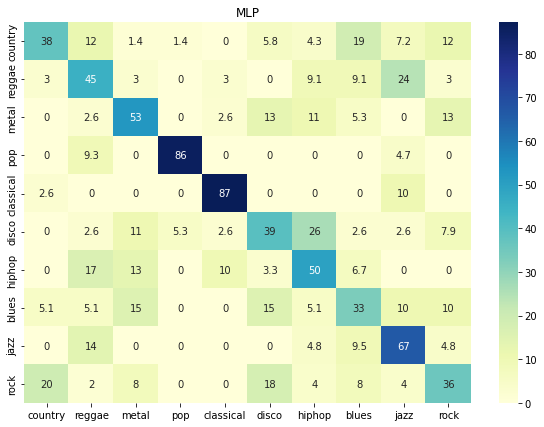

CONFUSION MATRIX FOR SVM_OVO:



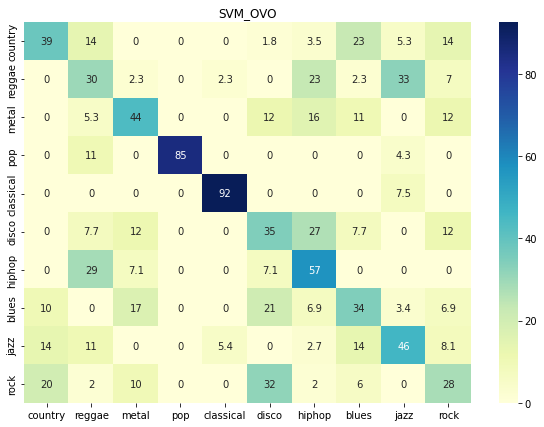

CONFUSION MATRIX FOR SVM_OVR:



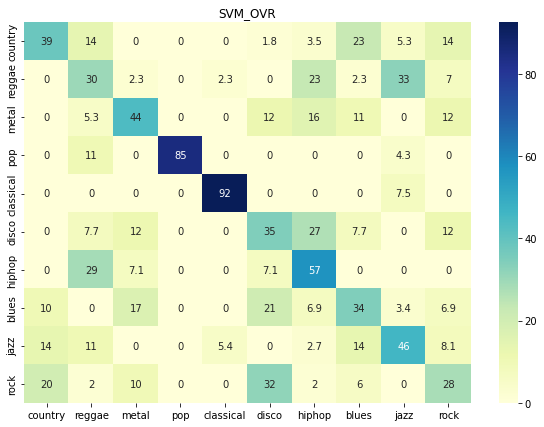

CONFUSION MATRIX FOR DECISION_TREE:



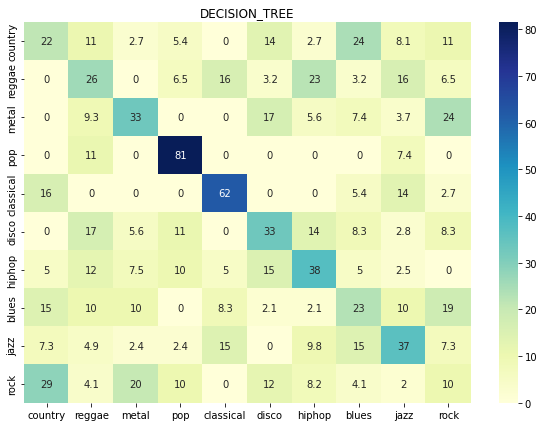

CONFUSION MATRIX FOR RANDOM_FOREST:



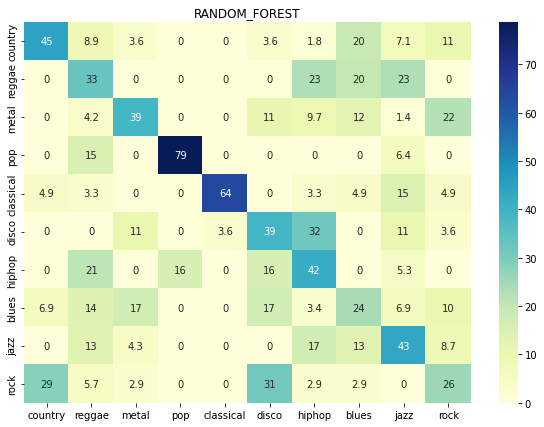

In [11]:
trainer.plot_confusion_matrix()